In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#loading the data
df = pd.read_csv(r'books1.csv')
#clearing the data
df = df[df['  num_pages'] != 0]
df = df[df['ratings_count'] != 0]
df = df[df['average_rating'] != 0]

In [243]:
#Spliting the data into the two groups of long books and short books
belowth = df[df["  num_pages"] < 1000]["average_rating"]
aboveth = df[df["  num_pages"] >= 1000]["average_rating"]

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

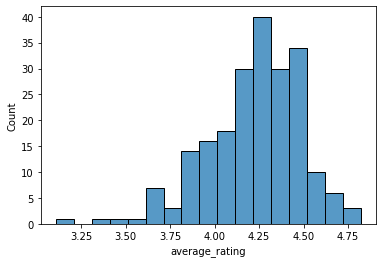

In [244]:
#plotting the data of long books
sns.histplot(aboveth)

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

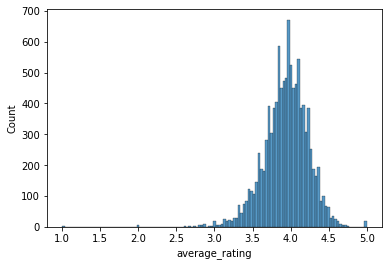

In [245]:
#plotting the long books data
sns.histplot(belowth)

In [246]:
#analyzing the data stats
x1 = belowth.mean()
n1 = len(belowth)
s1 = belowth.std(ddof=1)
median1 = belowth.median()
mode1 = belowth.mode()
range1 = belowth.max() - belowth.min()
x2 = aboveth.mean()
n2 = len(aboveth)
s2 = aboveth.std(ddof=1)
median2 = aboveth.median()
mode2 = aboveth.mode()
range2 = aboveth.max() - aboveth.min()
print("Short books stats summary:")
print("mean:", round(x1,2), "sample size:",n1,"SD:",round(s1,2), "median:",median1, "range:", range1, )
print("Long books stats summary:")
print("mean:",round(x2,2),"sample size:",n2,"SD:",round(s2,2), "median:", median2, "range:", round(range2,2))

Short books stats summary:
mean: 3.94 sample size: 10753 SD: 0.29 median: 3.96 mode: range: 4.0
Long books stats summary:
mean: 4.22 sample size: 215 SD: 0.26 median: 4.25 mode: range: 1.71


In [251]:
from scipy import stats
#calculating the weighted SE of the difference of means
standared_error = ( 
( (s1**2) /n1 ) + 
( (s2**2) /n2 ) 
) ** 0.5
#calculating the two score for the difference of means
t_score = abs((x1-x2))/standared_error
number_tails = 2
#degrees of freedom
dof = min(n1,n2) - 1
#calculating the p-value with according to the number of tails
p_value = number_tails * (1-stats.t.cdf(t_score,dof))
#calculating the poleen SD
psd= ( 
    ( (s1**2)*(n1-1) + (s2**2) *(n2-1)) / (n1+n2-2)
    )**0.5
#calculating Cohen's d for practical significance
cohens_d = (x2-x1)/psd
#calculating the confidence intervals for both long and short books data
CI1 = [round( (-stats.t.ppf(0.975, n1-1) * s1/n1**0.5) + x1, 3), round((stats.t.ppf(0.975, n1-1) * s1/n1**0.5) + x1,3)]
CI2 = [round((-stats.t.ppf(0.975, n2-1) * s2/n2**0.5) + x2, 3),round ((stats.t.ppf(0.975, n2-1) * s2/n2**0.5) + x2,3) ]
print("Confidance interval for the average rating of the short books:", CI1)
print("Confidance interval for the average rating of the long books:", CI2)
print("Mean of books with pages less than 500:", round(x1,2))
print("Mean of books with pages more than 500:", round(x2,2))
print("Standered error:", round(standared_error,3))
print("T_Score:", round(t_score,2))
print("dof:", dof)
print("P_Value:", p_value)
print("Boolean standard deviation:", round(psd,2))
print("Cohen's d:", round(cohens_d,2))

Confidance interval for the average rating of the short books: [3.932, 3.943]
Confidance interval for the average rating of the long books: [4.189, 4.26]
Mean of books with pages less than 500: 3.94
Mean of books with pages more than 500: 4.22
Standered error: 0.018
T_Score: 15.75
dof: 214
P_Value: 0.0
Boolean standard deviation: 0.29
Cohen's d: 0.98
